# Introduction to Regression with Neural Networks in TensorFlow

There are many defionations for a regression problem but in our case , we're going to simplify it : predicting a numerical variables based on some other combination of variables, even shoeter... predicting a number

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


### Creating data to vew and fit

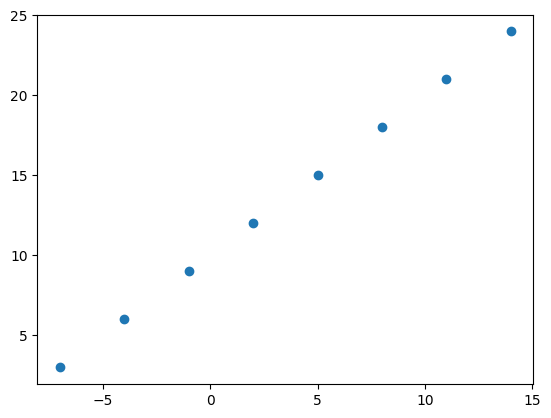

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0 ])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize  it
plt.scatter(X, y)

In [ ]:
y ==X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction probplem
house_info = tf.constant(['brdroom', 'bathroom', 'garage'])
house_price = tf.constant([940000])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'brdroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([940000], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[0].ndim

0

In [ ]:
# Turn our NumPy array into tesors
x = tf.constant(X, dtype=tf.float32)
y = tf.constant(y,dtype=tf.float32)
x , y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

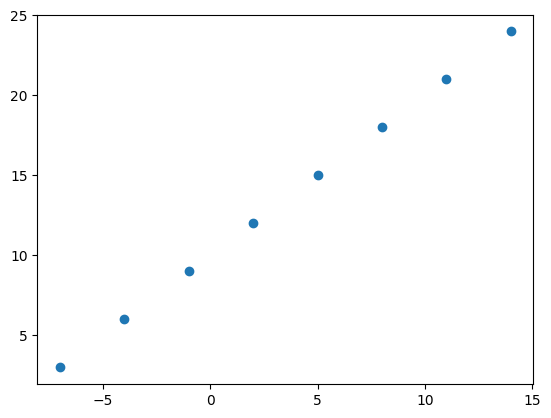

In [ ]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. *Creating a model* - define the input and output layers, as well as the hidden layers off a deep learning model.

2. *Complling a model* - define the loss function (in other words , the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation matrics (what we can use to interpret the performance of our model)

3. *Fitting a model* - letting the model try to find pattrens between X & y for features and labels

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient decent
              metrics=['mae'])

# 3. Fit the model
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 21.0486 - mae: 21.0486
Epoch 2/5
1/1 [==============================] - 0s 17ms/step - loss: 20.6555 - mae: 20.6555
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 20.3171 - mae: 20.3171
Epoch 4/5
1/1 [==============================] - 0s 15ms/step - loss: 20.0358 - mae: 20.0358
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 19.7546 - mae: 19.7546


In [ ]:
# Make our predictions
model.predict([17.0])

1/1 [==============================] - 0s 114ms/step


array([[-21.81724]], dtype=float32)

## Improving our model

We cnan improve our model, by altering the steps w etook to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each layer.
2. **Compiling a model** - here we moght change the optimization function or perhaps the ** learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs**  (leave it training for longer) or on more data(give the model more example to learn on).

In [ ]:
# Let's rebuilt our model

#1. Create the mdoel
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. fit the model
model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 492ms/step - loss: 16.4024 - mae: 16.4024
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 16.1212 - mae: 16.1212
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 15.8399 - mae: 15.8399
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 15.5587 - mae: 15.5587
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 15.2774 - mae: 15.2774
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 14.9962 - mae: 14.9962
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 14.7875 - mae: 14.7875
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 14.6550 - mae: 14.6550
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 14.5225 - mae: 14.5225
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 14.3900 - mae: 14.3900
Epoch 11/100
1/1 [==============================

In [ ]:
# remind ourself of the data
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Make predictions
model.predict([17.0])

1/1 [==============================] - 0s 63ms/step


array([[29.530539]], dtype=float32)

In [ ]:
# Let's seee if we can make another to improve model

#1. Create the model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[1], activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])

# 3. Fit the model
model.fit(x, y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.4220 - mae: 13.4220
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.3685 - mae: 13.3685
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 13.3149 - mae: 13.3149
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 13.2614 - mae: 13.2614
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 13.2078 - mae: 13.2078
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 13.1542 - mae: 13.1542
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 13.1007 - mae: 13.1007
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 13.0472 - mae: 13.0472
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9940 - mae: 12.9940
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9410 - mae: 12.9410
Epoch 11/100
1/1 [==============================] -

### Evaluating a model

In practice, a typically workflow you'll go through when building networks is:
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ......
```

when its comes to evaluation... there are 3 words you should memorize:

> "Visualize, Visualize, visualize"

It's a good idea to visualize:
* The data - ehat data are we working with? What does it look like?
* The model itself - What does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the line truth ( the original label)?

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

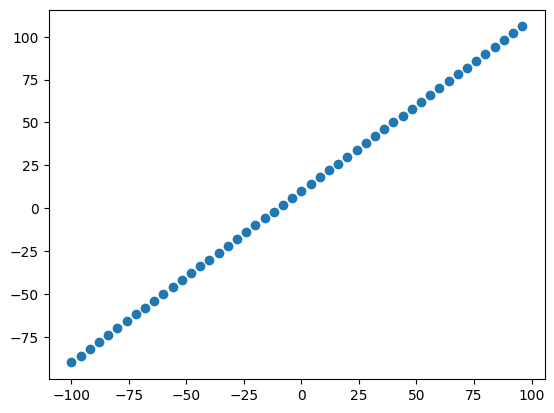

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 set...

* **The training set** - the model learns from this data, which is typically 70-80% of the total data you have available.

* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.

* **Test set**- the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into test and train set
X_train = X[:40] # First 40 are training samples(80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

## Visualize the data
Now we've got our data in training and test sets... let's visualize it again!

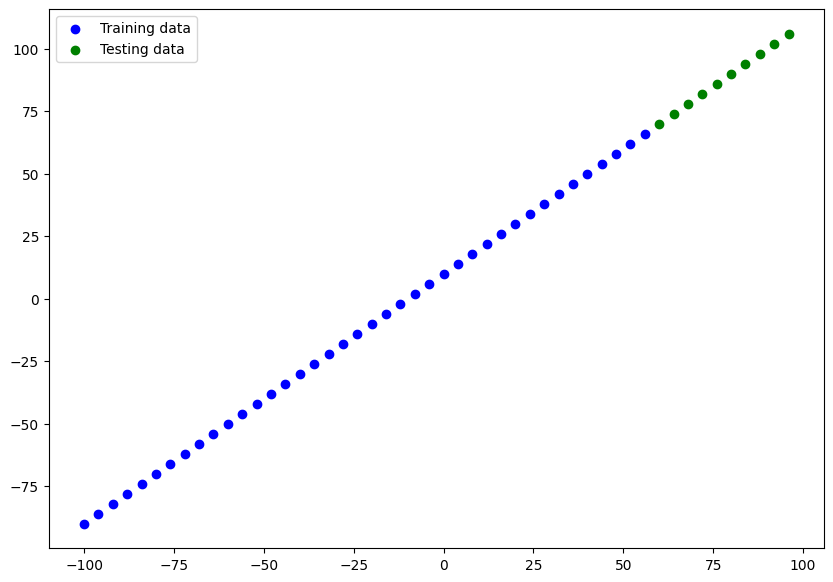

In [ ]:
plt.figure(figsize=(10, 7))
# Plot the training data
plt.scatter(X_train, y_train, c="b", label="Training data")

# plot the testing data
plt.scatter(X_test, y_test, c="g", label="Testing data")
# show the legend
plt.legend()

In [ ]:
# Let's have a look at how to built a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. fir=t the model
# model.fit(X_train, y_train, epochs=100)

## Visualizing  the model


In [ ]:
# Let's create a model which builts automatically by defining the input shape arguent
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(400, input_shape=[1], name="iput_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.01),
              metrics=['mae'])



In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 iput_layer (Dense)          (None, 400)               800       
                                                                 
 output_layer (Dense)        (None, 1)                 401       
                                                                 
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable prams - these are the parameters (patterns) the model cam update as it is trains.
* Non-trainable prams - these parameters are't update during training ( this is typically when you bring in already learn pattern or parameters from other models during  **transfer learning**).

In [ ]:
# Let's fit the model to training data
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 26ms/step - loss: 32.8256 - mae: 32.8256
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 14.1724 - mae: 14.1724
Epoch 3/100
2/2 [==============================] - 0s 18ms/step - loss: 16.1389 - mae: 16.1389
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 9.1222 - mae: 9.1222
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 13.1712 - mae: 13.1712
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 10.2253 - mae: 10.2253
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 8.0291 - mae: 8.0291
Epoch 8/100
2/2 [==============================] - 0s 26ms/step - loss: 9.5806 - mae: 9.5806
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 7.7556 - mae: 7.7556
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 6.5300 - mae: 6.5300
Epoch 11/100
2/2 [==============================] - 0s 10ms/st

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 iput_layer (Dense)          (None, 400)               800       
                                                                 
 output_layer (Dense)        (None, 1)                 401       
                                                                 
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


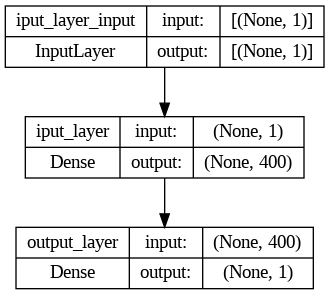

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good ides to plot them the ground truth labels.
Often you'll see this in form of **y_test** or **y_true** versus **y_pred** (ground truth versus your model's predictions).

In [ ]:
# Make some predictions
y_pred =  model.predict(X_test)
y_pred

1/1 [==============================] - 0s 73ms/step


array([[ 70.284424],
       [ 74.2899  ],
       [ 78.29539 ],
       [ 82.30087 ],
       [ 86.30636 ],
       [ 90.31183 ],
       [ 94.317314],
       [ 98.3228  ],
       [102.328285],
       [106.33376 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plot training data, test data and compare predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Traing data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Shoe the legend
  plt.legend();

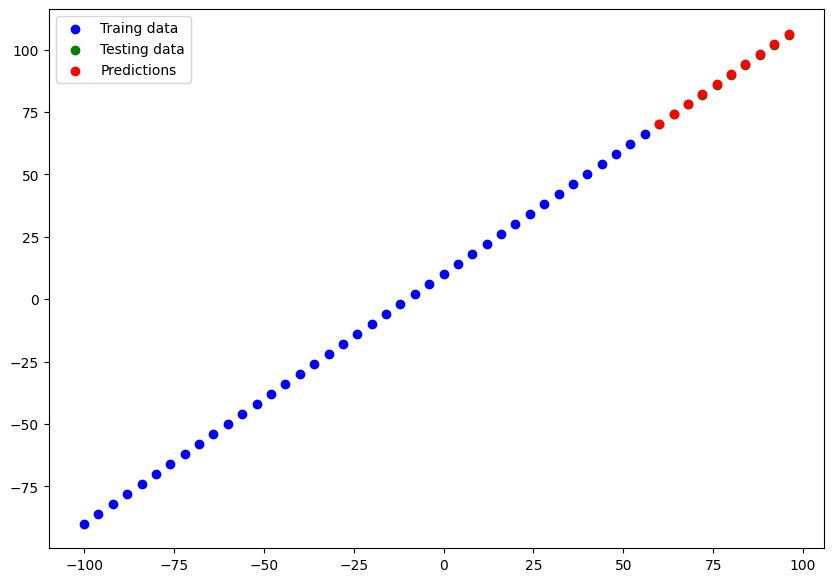

In [ ]:
plot_predictions()

### Evaluate our model's predictions with regression evaluation metrics

Depending on the problem you're workko=ing on, there will be different evaulation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* **MAE** - mean absolute error, "on average, how wrong is each of my model's predictions"
* **MSE** - mean square error, "square the average errors"

In [ ]:
# Evalluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 347ms/step - loss: 0.3091 - mae: 0.3091


[0.3090934753417969, 0.3090934753417969]

In [ ]:
# Calculate the mean absolute error
mae = tf.keras.losses.MAE(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.77246 , 14.626059, 12.281845, 10.739825, 10.      , 10.062366,
       10.926926, 12.593679, 15.062628, 18.333763], dtype=float32)>

In [ ]:
mae2 = tf.metrics.mean_absolute_error(y_test, tf.constant(y_pred))
mae2

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.77246 , 14.626059, 12.281845, 10.739825, 10.      , 10.062366,
       10.926926, 12.593679, 15.062628, 18.333763], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.284424],
       [ 74.2899  ],
       [ 78.29539 ],
       [ 82.30087 ],
       [ 86.30636 ],
       [ 90.31183 ],
       [ 94.317314],
       [ 98.3228  ],
       [102.328285],
       [106.33376 ]], dtype=float32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.284424,  74.2899  ,  78.29539 ,  82.30087 ,  86.30636 ,
        90.31183 ,  94.317314,  98.3228  , 102.328285, 106.33376 ],
      dtype=float32)>

In [ ]:
# Calculate mean absolute erroe
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.30909348>

In [ ]:
from matplotlib.axes import mstream
# Calculate the mean square error
mse = tf.keras.losses.MSE(y_true=y_test,
                                   y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.09578674>

In [ ]:
MSE = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
MSE

<tf.Tensor: shape=(), dtype=float32, numpy=0.09578674>

In [ ]:
# Make some function to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                            y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model
```
Built a model -> fit it -> evaluate it -> tweak it -> fit it ->evaluate it -> tweak it -> fit it -> evaluate it.....
```

1. Get more data - get more examples for your model to train on (more opportunities to learn pattern or relationships between features and labels).

2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.

3. Train for longer - give your model more chance to find patterns in data.

Let's fo 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model
model_1.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 37ms/step - loss: 99.0455 - mae: 99.0455
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 63.5900 - mae: 63.5900
Epoch 3/100
2/2 [==============================] - 0s 21ms/step - loss: 26.4409 - mae: 26.4409
Epoch 4/100
2/2 [==============================] - 0s 17ms/step - loss: 11.3192 - mae: 11.3192
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 12.5640 - mae: 12.5640
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 9.7238 - mae: 9.7238
Epoch 7/100
2/2 [==============================] - 0s 18ms/step - loss: 8.8196 - mae: 8.8196
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 9.0926 - mae: 9.0926
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 19.3219 - mae: 19.3219
Epoch 10/100
2/2 [==============================] - 0s 14ms/step - loss: 10.4519 - mae: 10.4519
Epoch 11/100
2/2 [==============================] - 0s 

1/1 [==============================] - 0s 146ms/step


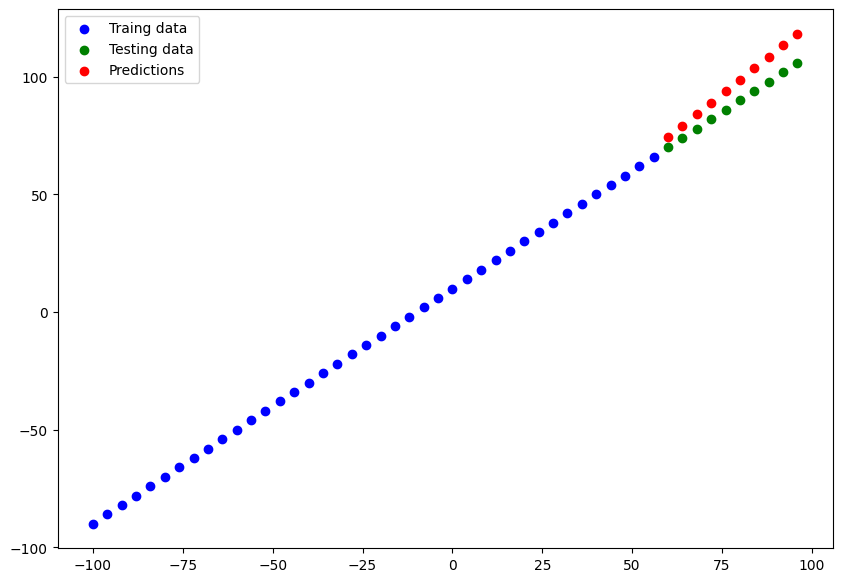

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate the model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.357841>,
 <tf.Tensor: shape=(), dtype=float32, numpy=76.17665>)

**Build `model_2`**
* 2 dense layers, trained for 100 epochs



In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 18ms/step - loss: 29.3545 - mae: 29.3545
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 26.4655 - mae: 26.4655
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 30.3117 - mae: 30.3117
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 16.8720 - mae: 16.8720
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 19.3666 - mae: 19.3666
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 13.5792 - mae: 13.5792
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 12.7461 - mae: 12.7461
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 11.1121 - mae: 11.1121
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 40.3681 - mae: 40.3681
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 27.7770 - mae: 27.7770
Epoch 11/100
2/2 [==============================] -

1/1 [==============================] - 0s 49ms/step


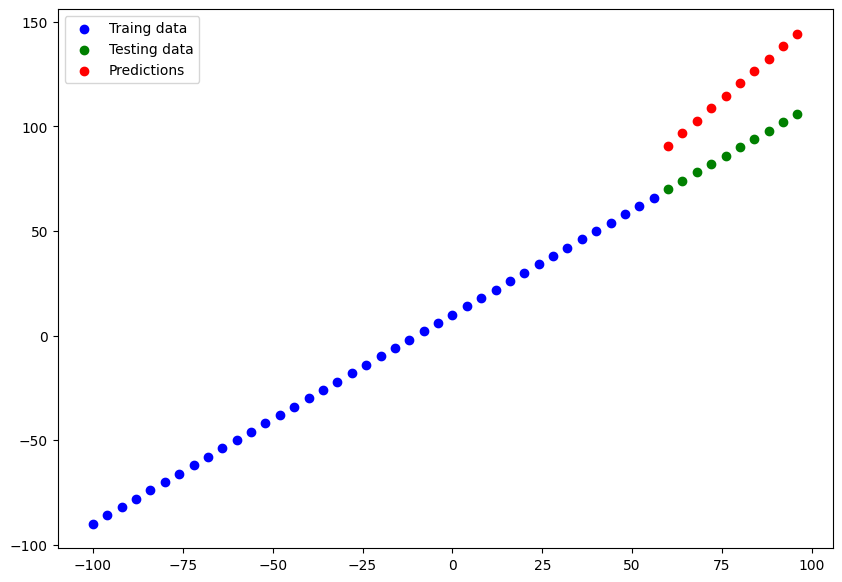

In [ ]:
# Make the predictions and plot it
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=29.604889>,
 <tf.Tensor: shape=(), dtype=float32, numpy=907.3883>)

**Build `model_3`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_3.fit(X_train, y_train, epochs=310)

Epoch 1/310
2/2 [==============================] - 0s 12ms/step - loss: 7.6065 - mae: 7.6065
Epoch 2/310
2/2 [==============================] - 0s 8ms/step - loss: 14.1461 - mae: 14.1461
Epoch 3/310
2/2 [==============================] - 0s 9ms/step - loss: 48.7617 - mae: 48.7617
Epoch 4/310
2/2 [==============================] - 0s 8ms/step - loss: 24.7684 - mae: 24.7684
Epoch 5/310
2/2 [==============================] - 0s 7ms/step - loss: 14.7773 - mae: 14.7773
Epoch 6/310
2/2 [==============================] - 0s 7ms/step - loss: 11.9041 - mae: 11.9041
Epoch 7/310
2/2 [==============================] - 0s 7ms/step - loss: 13.1070 - mae: 13.1070
Epoch 8/310
2/2 [==============================] - 0s 10ms/step - loss: 11.3128 - mae: 11.3128
Epoch 9/310
2/2 [==============================] - 0s 8ms/step - loss: 42.3990 - mae: 42.3990
Epoch 10/310
2/2 [==============================] - 0s 8ms/step - loss: 29.5508 - mae: 29.5508
Epoch 11/310
2/2 [==============================] - 0s 8ms/

1/1 [==============================] - 0s 47ms/step


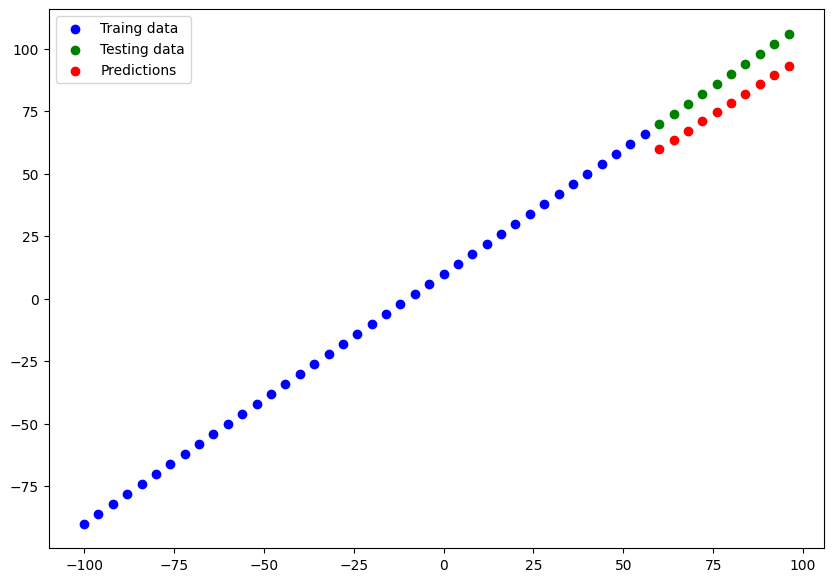

In [ ]:
# Make predictions and plot them
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate the evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=11.5224085>,
 <tf.Tensor: shape=(), dtype=float32, numpy=133.53159>)

### Comparing the result of our experiments

we've run a few experiments, let's compare the results.

In [ ]:
# Let's compare our model's result using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2",mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_2.numpy()]]

all_results = pd.DataFrame(model_results, columns= ["model", "mae", "mse"])
all_results


,model,mae,mse
0,model_1,8.357841,76.176651
1,model_2,29.604889,907.388306
2,model_3,11.522408,907.388306


In [ ]:
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Tracking your experiments

One really good habit in machine learning modelling is to track the resukt of your experiments.

And when doing so, it can be tedious if you;re running lots of experiments.

Luckily, there are tools to help us!

As you built more models, you'll want to look into using:

* **TensorBoard** - a component of TensorFlow library to help track modelling experiments.

* **Weights & biases** - Atool for tracking all kind of machine learning experiments.

## Saving our models

Saving our model allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app

There are two main formats we can save our model to:
1. **The SavedModel format**
2. **The HDF5 format**

In [ ]:
# Save model
model_3.save("best_model_SaveModel_format")
model_3.save('model_3.h5')

## Loading in a saved model


In [ ]:
# Load in the Save Model Format
load_save_model_format = tf.keras.models.load_model("/content/best_model_SaveModel_format")
load_save_model_format.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compare the predictions of saved model and existing model
model_3_preds = model_3.predict(X_test)
load_save_model_format_preds = load_save_model_format.predict(X_test)

model_3_preds == load_save_model_format_preds

1/1 [==============================] - 0s 46ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a model using the .h5 format
load_h5_model = tf.keras.models.load_model("/content/model_3.h5")
load_h5_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the predictions of both models
load_h5_model_preds = load_h5_model.predict(X_test)
model_3_preds == load_h5_model_preds

1/1 [==============================] - 0s 49ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### Download a model (or any other file ) from Google Colab

If you want to download your files from Googlr Colab:

1. You can go to the "files" tab and right Click on the file you're after and click "Download".

2. Use code


In [ ]:
# Download a file from Google Colab
# from google.colab import files
# files.download("/content/model_3.h5")

## A large example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance["smoker"], insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [ ]:
# Let's try one-hot encode our dataframe so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X &y values (features and lables)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Creating train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
len(X_train), len(y_train), len(X_test), len(y_test)

(1070, 1070, 268, 268)

In [ ]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8595.3301 - mae: 8595.3301
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7793.9365 - mae: 7793.9365
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7608.1250 - mae: 7608.1250
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7665.5649 - mae: 7665.5649
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7719.8604 - mae: 7719.8604
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7713.2036 - mae: 7713.2036
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7588.0576 - mae: 7588.0576
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7723.2627 - mae: 7723.2627
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7624.0308 - mae: 7624.0308
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7681.1421 - mae: 7681.1421

In [ ]:
insurance_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                120       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the result of the insurance_model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8592.0898 - mae: 8592.0898


[8592.08984375, 8592.08984375]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't perform well let's try to improve our model

In [ ]:
# Improving our model
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])
history =  insurance_model_2.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 [==============================] - 3s 6ms/step - loss: 11566.6973 - mae: 11566.6973
Epoch 2/200
34/34 [==============================] - 0s 6ms/step - loss: 7513.3188 - mae: 7513.3188
Epoch 3/200
34/34 [==============================] - 0s 6ms/step - loss: 7264.5771 - mae: 7264.5771
Epoch 4/200
34/34 [==============================] - 0s 6ms/step - loss: 7080.6094 - mae: 7080.6094
Epoch 5/200
34/34 [==============================] - 0s 6ms/step - loss: 6900.7886 - mae: 6900.7886
Epoch 6/200
34/34 [==============================] - 0s 6ms/step - loss: 6711.1733 - mae: 6711.1733
Epoch 7/200
34/34 [==============================] - 0s 6ms/step - loss: 6677.8521 - mae: 6677.8521
Epoch 8/200
34/34 [==============================] - 0s 6ms/step - loss: 6612.7158 - mae: 6612.7158
Epoch 9/200
34/34 [==============================] - 0s 6ms/step - loss: 6561.0439 - mae: 6561.0439
Epoch 10/200
34/34 [==============================] - 0s 5ms/step - loss: 6490.9116 - mae: 6490.91

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3171.8367 - mae: 3171.8367


[3171.836669921875, 3171.836669921875]

Text(0.5, 0, 'epochs')

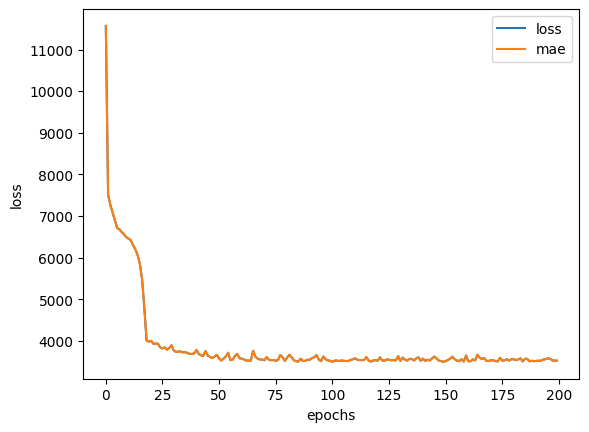

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

### Preprocessing Data (normalization and atandardization)

Interms od=f scalling values, neural networks tends to prefer normalization.

If not shure which to use try both and see which perform better

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Read in the insurance dataframe
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", 'children']), # turn all the values in in these column between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ["sex", "smoker", 'region'])
)

# Create X & y
X = insurance.drop('charges', axis=1)
y = insurance["charges"]

# Butilt our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training dat
ct.fit(X_train)

# Transform training and test data normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does ou data look like now
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
# Build a neural network model to fit on our normolized data
tf.random.set_seed(42)

normal_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(300),
    tf.keras.layers.Dense(1)
])

normal_model.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["mae"])

normal_model.fit(X_train_normal, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 4s 4ms/step - loss: 13281.4639 - mae: 13281.4639
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 11798.2832 - mae: 11798.2832
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 8205.1895 - mae: 8205.1895
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7693.8706 - mae: 7693.8706
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7277.4658 - mae: 7277.4658
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 6749.6060 - mae: 6749.6060
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 5894.5449 - mae: 5894.5449
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 4562.9810 - mae: 4562.9810
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 3731.7195 - mae: 3731.7195
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 3683.0337 - mae: 3683.

In [ ]:
# Evaluate our insurance model trained on normalized data
normal_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 16ms/step - loss: 3167.2363 - mae: 3167.2363


[3167.236328125, 3167.236328125]